# Parcial 2-  Analítica de Datos 
### *Pontificia Universidad Javeriana* 
#### **Autor:** David Santiago Barreto Mora
#### **Curso:** Analítica de Datos
#### **Profesor:** John Jairo Corredor Franco
---

# Objetivo 
El objetivo de este cuaderno es entrenar un módelo de aprendizaje de máquina para hacer predicciones sobre el clima de un día, basado en datos meteorológicos como la temperatura, humedad, presión y relacionados. 

Los datos para este proyecto pueden ser encontrados en el link:
https://github.com/corredor-john/ExploratoryDataAnalisys/blob/main/Varios/weatherHistory.csv

# Selección de datos
La base de datos elegida para el proyecto es un archivo csv con información meteorológica, tales como fecha, descripción del clima del día, temperatura, velocidad del viento y otros indices meteorológicos clave que se verán a continuación.

Ahondando en el objetivo, se busca entrenar el modelo de ML para poder predecir correctamente el resultado del atributo "Summary"; atributo que ahora se convertirá en nuestra variable objetivo.

Iniciamos importando nuestras librerías esenciales para la analítica de datos y con la creación de nuestro dataframe.

In [38]:
# Manipulación de datos
import pandas as pd

# Visualización de datos
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Creamos el dataframe con loa base de datos del clima
weather_df = pd.read_csv('weatherHistory.csv')

In [40]:
# Hacemos una revisión visual de los datos
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


## Análisis Exploratorio de Datos 
Llevaremos a cabo todos los procedimientos esenciales de la exploración de datos. Información del dataframe, como su tamaño, columnas, tipos de datos, información faltante y relacionados seran encontrados a continuación.

In [41]:
# Tamaño del dataframe
weather_df.shape


(96453, 12)

In [42]:
# Columnas del dataframe
weather_df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [43]:
# Tipos de datos de las columnas
weather_df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [44]:
# Descripción estadística de los datos numéricos
weather_df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [45]:
# Revisión de datos nulos o faltantes
weather_df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [46]:
# Valores posibles para la variable objetivo, "Summary"
weather_df["Summary"].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [47]:
# Distribución de valores para la variable objetivo, "Summary"
weather_df["Summary"].value_counts()

Summary
Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Hu

/Users/davidbarreto/Documents/University/6thSemester/DataAnalytics/Project/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/davidbarreto/Documents/University/6thSemester/DataAnalytics/Project/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/davidbarreto/Documents/University/6thSemester/DataAnalytics/Project/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


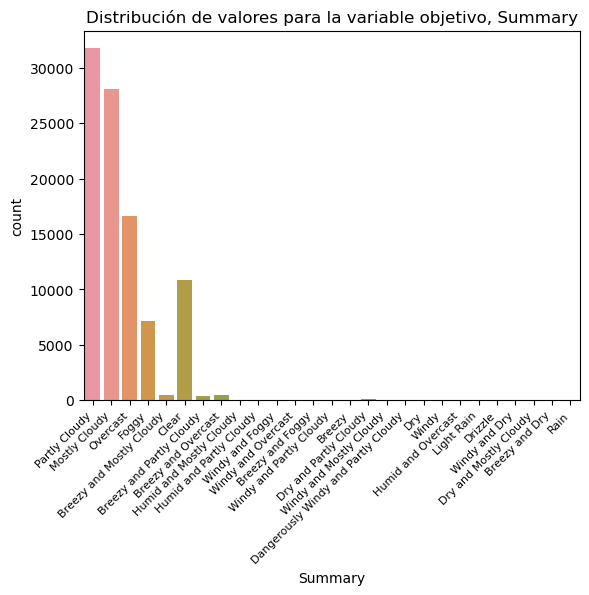

In [48]:
# Visualización de la distribución de valores para la variable objetivo, "Summary"
sns.countplot(x="Summary", data=weather_df)

plt.title("Distribución de valores para la variable objetivo, Summary")
plt.xticks(rotation=45, fontsize=8, ha='right')
plt.show()

### Codificación de variables y matríz de correlación
Importamos las librerías necesarias para codificar nuestras variables, y poder hacer analizarlas y aplicarles modelos.

In [ ]:
# Matriz de correlación de las variables numéricas
weather_Df_encoded = pd.get_dummies(weather_df, columns=['Summary', 'Precip Type'], drop_first=True)


weather_Df_encoded = weather_Df_encoded.drop('Formatted Date', axis=1)

# Matriz de correlacion
correlation_matrix = weather_Df_encoded.corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:

X = pd.get_dummies(weather_df.drop(['Formatted Date', 'Summary'], axis=1), columns=['Precip Type'])
y = weather_df['Summary']

# Particionamiento de los datos (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

# Puntajes
rf_score = accuracy_score(y_test, rf_predictions)
nb_score = accuracy_score(y_test, nb_predictions)

print("Random Forest Accuracy:", rf_score)
print("Naive Bayes Accuracy:", nb_score)

In [ ]:
from sklearn.model_selection import cross_val_score

# Random Forest cross-validation
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5)  
print("Random Forest Cross-Validation Scores:", rf_cv_scores)

# Naive Bayes cross-validation
nb_cv_scores = cross_val_score(nb_model, X, y, cv=5)  
print("Naive Bayes Cross-Validation Scores:", nb_cv_scores)

Hola profe, una nota rápida. Soy plenamente consciente de que este notebook no es de la calidad que nos has enseñado. Lo siento profundamente por eso, esta semana ha sido horrible para mi. 

Sin embargo, aprovecho para agradecerte por empujarnos a ser excelentes profesionales; tu clase fue de la que más aprendi y hasta disfrute. 